In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mymodels

In [2]:
import gc

gc.collect()

0

In [3]:
dataset_folder = '../dataset2'
checkpoints_folder = '../checkpoints_sect2/'
logs_folder = '../logs/'

In [4]:
X = np.load(dataset_folder + '/X_cropped.npy')
y = np.load(dataset_folder + '/y_train.npy')

X_test = np.load(dataset_folder + '/X_cropped.npy')
y_test = np.load(dataset_folder + '/y_train.npy')

In [5]:
X = X.reshape(X.shape[0], 42, 42)
X_test = X_test.reshape(X_test.shape[0], 42, 42)

In [6]:
model = mymodels.sect2()
model.compile()


In [9]:
params = {'epochs': 30, 
          'batch_size': 1024, 
          'tensorboard': True, 
          'cp_callback': True}

run = model.train(X_test, y, X_test, y_test, params, logs_folder, checkpoints_folder)

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.9340 - loss: 0.2954
Epoch 1: saving model to ../checkpoints_sect2/model_epoch_01.weights.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step - accuracy: 0.9340 - loss: 0.2954 - val_accuracy: 0.9830 - val_loss: 0.1560
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.9320 - loss: 0.2964
Epoch 2: saving model to ../checkpoints_sect2/model_epoch_02.weights.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - accuracy: 0.9320 - loss: 0.2964 - val_accuracy: 0.9830 - val_loss: 0.1472
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.9430 - loss: 0.2682
Epoch 3: saving model to ../checkpoints_sect2/model_epoch_03.weights.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step - accuracy: 0.9430 - loss: 0.2682 - val_accuracy: 0.9840 - val_loss: 0.1402
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9310 - loss: 0.2786
Epoch 4: saving model to ../checkpoints_sect2/model_epoch_04.weights.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416

The history has the following data:  dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


Text(0, 0.5, 'accuracy')

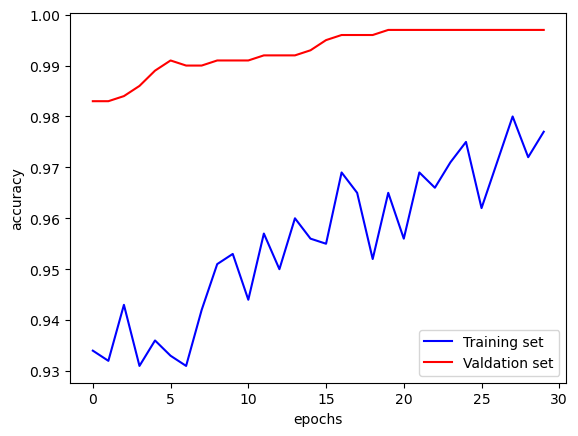

In [11]:
history_model = run.history
print("The history has the following data: ", history_model.keys())

# Plotting the training and validation accuracy during the training
sns.lineplot(
    x=run.epoch, y=history_model["accuracy"], color="blue", label="Training set"
)
sns.lineplot(
    x=run.epoch,
    y=history_model["val_accuracy"],
    color="red",
    label="Valdation set",
)
plt.xlabel("epochs")
plt.ylabel("accuracy")

In [12]:
checkpoint_dir = checkpoints_folder + 'model_epoch_30.weights.h5'

model.evaluate(X_test, y_test, checkpoint_dir)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9983 - loss: 0.0451 


[0.04348491132259369, 0.996999979019165]

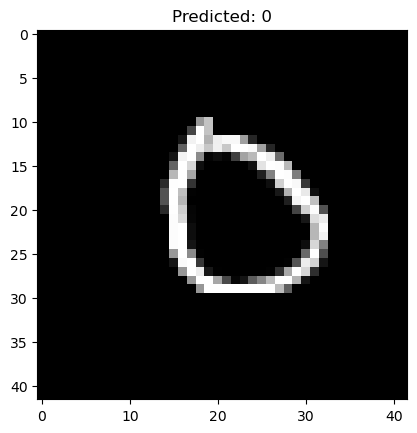

In [41]:
random_sample = np.random.randint(0, X_test.shape[0])

image = X_test[random_sample]
actual = y_test[random_sample]
prediction = model.predict(X_test[random_sample].reshape(1, 42, 42, 1))

plt.imshow(image, cmap='gray')
plt.title(f"Predicted: {prediction.argmax()}")
plt.show()